In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 15 ##

## Probability ##

In [3]:
# Discussion Question (a)
# P(Mo and Jo both appear)
#P(Mo first, then Jo) + P(Jo first, then Mo)
(1/100) * (1/99) + (1/100) * (1/99)

0.00020202020202020205

In [4]:
# Discussion Question (b)
# P(neither Mo nor Jo appears)
#P(neither picked first) * P(neither picked second given neither picked first)
(98/100) * (97/99)

0.9602020202020202

## Random Sampling ##

In [5]:
united = Table.read_table('united_summer2015.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')

In [6]:
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


In [7]:
united.where('Flight Number', 73)

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
151,6/2/15,73,HNL,0
297,6/3/15,73,HNL,354
446,6/4/15,73,HNL,64
603,6/5/15,73,HNL,0
761,6/6/15,73,HNL,39
885,6/7/15,73,HNL,7
1032,6/8/15,73,HNL,7
1189,6/9/15,73,HNL,14
1344,6/10/15,73,HNL,0


In [8]:
united.take(make_array(999,1000,1001))

Row,Date,Flight Number,Destination,Delay
999,6/7/15,1684,LIH,-3
1000,6/7/15,1692,EWR,7
1001,6/7/15,1699,ATL,6


In [9]:
start = np.random.choice(np.arange(1000))
systematic_sample = united.take(np.arange(start, united.num_rows, 1000))
systematic_sample.show()

Row,Date,Flight Number,Destination,Delay
545,6/4/15,1474,DEN,-2
1545,6/11/15,620,ORD,-5
2545,6/17/15,1937,IAH,18
3545,6/24/15,1257,ANC,81
4545,7/1/15,718,SEA,-3
5545,7/8/15,710,DEN,76
6545,7/14/15,1751,LAS,0
7545,7/21/15,1091,DEN,9
8545,7/27/15,1984,PDX,-1
9545,8/3/15,1178,PDX,5


## Distributions ##

In [10]:
die = Table().with_column('Face', np.arange(1, 7))
die

Face
1
2
3
4
5
6


In [11]:
die.sample(10)

Face
3
6
1
2
5
2
6
6
1
3


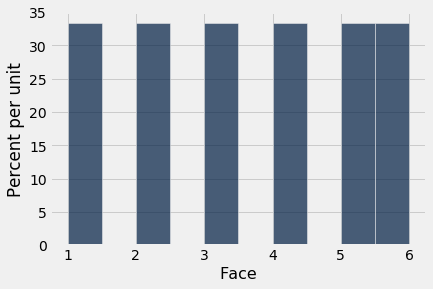

In [12]:
die.hist()

In [13]:
roll_bins = np.arange(0.5, 6.6, 1)

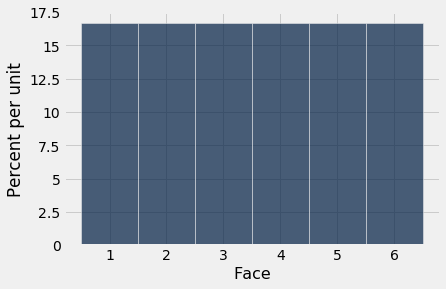

In [14]:
die.hist(bins=roll_bins)

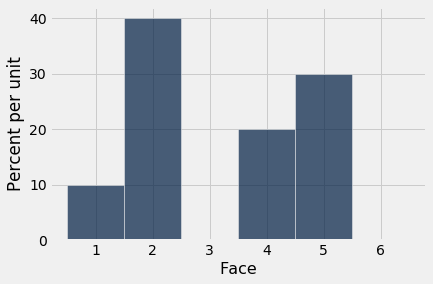

In [15]:
die.sample(10).hist(bins=roll_bins)

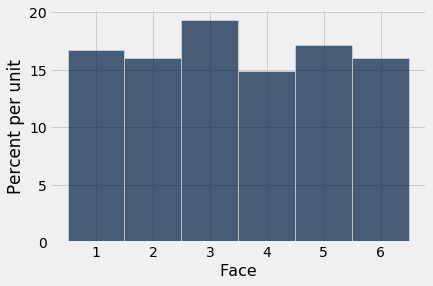

In [16]:
die.sample(1000).hist(bins=roll_bins)

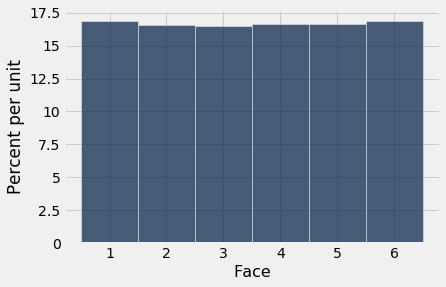

In [17]:
die.sample(100000).hist(bins=roll_bins)

## Large Random Samples ##

In [18]:
united 

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


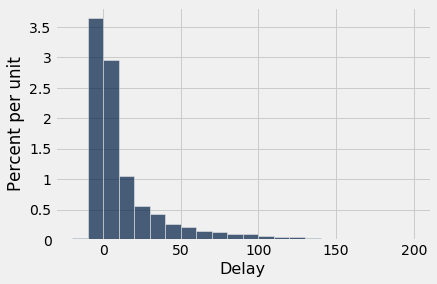

In [19]:
united_bins = np.arange(-20, 201, 10)
united.hist('Delay', bins = united_bins)

In [20]:
min(united.column('Delay'))

-16

In [21]:
max(united.column('Delay'))

580

In [22]:
np.average(united.column('Delay'))

16.658155515370705

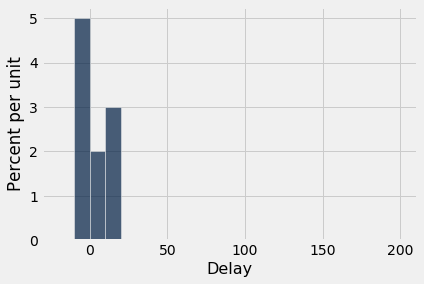

In [23]:
united.sample(10).hist('Delay', bins = united_bins)

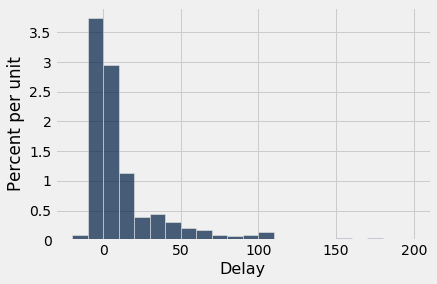

In [24]:
united.sample(1000).hist('Delay', bins = united_bins)

## Simulating Statistics ##

In [25]:
np.median(united.column('Delay'))

2.0

In [26]:
united.where('Delay', are.below(2.01)).num_rows / united.num_rows

0.5018444846292948

In [27]:
np.median(united.sample(10).column('Delay'))

3.5

In [28]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [29]:
sample_median(10)

1.0

In [38]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(10)
    sample_medians = np.append(sample_medians, new_median)

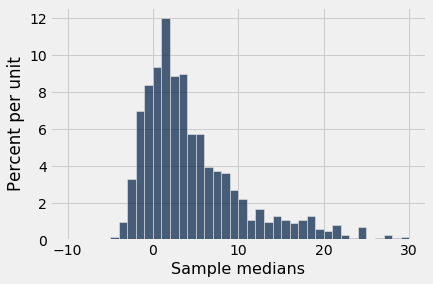

In [39]:
Table().with_column('Sample medians', sample_medians).hist(bins = np.arange(-10,31))

In [41]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = sample_median(1000)
    sample_medians = np.append(sample_medians, new_median)

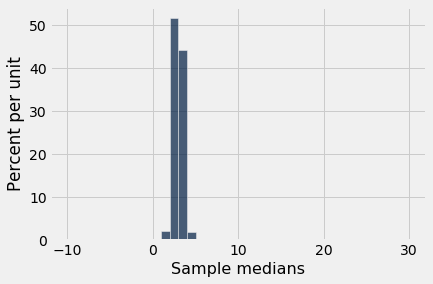

In [43]:
Table().with_column('Sample medians', sample_medians).hist(bins = np.arange(-10,31))